## Final Project Submission

* *__Student name:__ Elsie Serem*

* *__Technical Manager:__ Antonny Muiko*


## Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Overview

 The aim of this project is to identify the most successful film genres, themes and audience demographics and analyse these trends in box office. Insights on the types of movies that are performing best will be gathered and their actions translated into actionable recommendations focusing on the guiding descisions on content creation and target audience engagement, for the new movie studio endorsed by ABC Industries,  which will in turn ensure the production of commercially successful films.

## Business Understanding

ABC Industries is looking to expand to the film industry but it lacks expertise. To ensure the studio's success, it is essential to understand what types of films are currently thriving at the box office. The goal of this project is to identify the most successful film genres, themes, and audience demographics, and analyze these trends to make informed strategic decisions on content creation and target audience engagement.

By conducting a thorough analysis of box office trends, this project aims to provide actionable recommendations for the new movie studio. These insights will guide the studio's content creation strategy, enabling them to produce commercially successful films that resonate with their target audience. Ultimately, this project will help ABC Industries' new movie studio establish a strong foothold in the competitive film industry and achieve long-term success.

### Stakeholders
The primary stakeholders for this project include:

* *ABC Industries Executives:* To inform strategic decision-making and investment in content creation.
* *New Movie Studio Management:* To guide the production and marketing strategies.
* *Content Creators and Directors:* To understand current trends and audience preferences.
* *Marketing Teams:* To effectively target and engage the right audience demographics.

### Business Questions to be answered

1. What are the top three genres that should be utilized for content creation?
2. What genres of movies are currently performing well at the box office in terms of income generation?
3. Which directors tend to produce movies with higher commercial success, and should we consider working with them?
4. What are the key characteristics that ensure the success of movies in the long run? 


## Data Understanding
### Data Sources and Suitability
The analysis uses data from Box Office Mojo (BOM), Rotten Tomatoes (RT), TheMovieDB (TMDB), and The Numbers (TN), selected for their comprehensive movie performance insights:

1. Box Office Mojo (BOM): Provides domestic and foreign gross revenue.
2. Rotten Tomatoes (RT): Includes critic reviews, ratings, and detailed movie info.
3. TheMovieDB (TMDB): Offers popularity, release dates, and user ratings.
4. The Numbers (TN): Contains production budgets, domestic, and worldwide gross revenues.
### Feature Relevance
These features are crucial for addressing the business questions:

* Gross Revenues: To assess financial success.
* Ratings and Genre: To identify popular and critically acclaimed genres.
* Director: To find directors associated with successful movies.
* Runtime: To understand preferred movie lengths.
* Popularity and User Ratings: To gauge audience engagement.
* Production Budget: To analyze financial aspects and profitability.
* Worldwide Gross: To evaluate overall financial performance.

### Data Limitations
Key limitations include:

* Missing Values: Addressed through imputation or deletion.
* Data Consistency: Variations in data collection methods.
* Historical Data: Might not capture recent trends.
* Genre Classification: Movies often fit multiple genres,     affecting classification accuracy.

By focusing on these features, the analysis aims to provide actionable insights for ABC Industries' new movie studio to guide content creation and target audience engagement.

## Data Preparation


### Loading the data
The first step is to load the datasets from, Box Office Mojo(BOM), IMDB, Rotten Tomatoes(RT), TheMovieDB(TM_DB) and The Numbers(TN) after importing all the necessary libraries that wil be utilized throughout the entire process.

In [1]:
# importing all the necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import sqlite3

Import and Load the datasets to the notebook

In [2]:
# Load the BOM dataset
bom= pd.read_csv("zippedData/bom.movie_gross.csv.gz")


In [3]:
# Load the RT datasets
rt_reviews= pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')
rt_info= pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")


In [4]:
# Load the TM-DB dataset
tmdb= pd.read_csv("./zippedData/tmdb.movies.csv.gz")

In [5]:
# Load the TN dataset
tn= pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')


The datasets that will be focused on throughout the entire analysis will only be four. The IMDB dataset will be droppoed due to the act that the information that we need can already be found in the remaining four.

### Data cleaning
The next step will be cleaning of the data, this is where we get more information on the data such as its description and structure, then we move on to addressing issues such as, missing values and duplicates among others. By addressing missing values, casting datatypes, and handling compound entries, we can ensure the data is accurate and suitable for further exploration and insights generation.


We will go through each of the datasets one by one, in order to identify the exact information that will be appropriate for the entirety of this project.

#### BOM Dataset

In [6]:
# use .info() and .head() function to get basic information in this dataset
bom.info()
bom.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Impute the median value to replace the null values
bom['domestic_gross'].fillna(bom['domestic_gross'].median(),inplace= True)

#For categorical data such as  studio impute null values with mode
bom['studio'].fillna(bom['studio'].mode()[0], inplace= True) # inplace= true ensures the canges are permanent

# drop the rows in the foreign_gross column which have null values
bom_1= bom.dropna(subset=['foreign_gross'])

# change the datatype of the same column to float
bom_1.loc['foreign_gross'] = bom_1['foreign_gross'].str.replace(",","").astype(float) # astype() returna a converted datatype

bom_1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15268\3325635365.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_1.loc['foreign_gross'] = bom_1['foreign_gross'].str.replace(",","").astype(float) # astype() returna a converted datatype


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0
3,Inception,WB,292600000.0,535700000,2010.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0


In [8]:
# Confirming that there are no missing values
bom_1.info()
bom_1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to foreign_gross
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2037 non-null   object 
 2   domestic_gross  2037 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   float64
dtypes: float64(2), object(3)
memory usage: 95.5+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0
3,Inception,WB,292600000.0,535700000,2010.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0


#### RT_Reviews and RT_Info Datasets

In [9]:
# use .info() and .head() function to get basic information in this dataset
rt_reviews.info()
rt_reviews.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
# Chage the datatypes to the appropriate type that will be more applicable during the analysis
rt_reviews['review'] = rt_reviews['review'].astype(str)
rt_reviews['publisher'] = rt_reviews['publisher'].astype(str)
rt_reviews['date'] = pd.to_datetime(rt_reviews['date'])


 According to the information provided, there are some missing values with rating, review and critic topping the list. Although important, we may have to drop some of themas we continue with the analysis, for those with 10% or less missing values, we will impute accordingly.

In [11]:
# check for duplicates
(rt_reviews.duplicated())# there are no duplicated values

0        False
1        False
2        False
3        False
4        False
         ...  
54427    False
54428    False
54429    False
54430    False
54431    False
Length: 54432, dtype: bool

In [12]:
# Drop columns with high missing values 
rt_reviews.drop(columns = ['rating','critic'], inplace= True)

For the rt_info dataset there are no duplicates however there are some missing values that need to be addressed by either dropping them or imputing values

In [13]:
# Check the basic information of the dataset
rt_info.info()
rt_info.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
# change the columns to the right datatype
# Categorical data
rt_info['rating']= rt_info['rating'].astype('category')
rt_info['genre']= rt_info['genre'].astype('category')
rt_info['studio']= rt_info['studio'].astype('category')

# to_datetime function
rt_info['theater_date']= pd.to_datetime(rt_info['theater_date'], errors ='coerce') #prevents pandas from raising an error due to the NAN values
rt_info['dvd_date']= pd.to_datetime(rt_info['dvd_date'], errors ='coerce')

# Convert to strings
rt_info['director']= rt_info['director'].astype(str)
rt_info['writer']= rt_info['writer'].astype(str)


In [15]:
# Change the column name from runtime to runtime in minutes
rt_info = rt_info.rename(columns= { 'runtime': 'runtime in minutes'}) # This is so that we know that the values in the cilumns are in minutes

# remove the word minutes
rt_info['runtime in minutes'] = rt_info['runtime in minutes'].str.replace(' minutes', '')

#convert to integers
rt_info['runtime in minutes'] = pd.to_numeric( rt_info[ 'runtime in minutes'], errors ='coerce')

In [16]:
# Impute missing values in the synopsis column with the mode 
rt_info['synopsis'] = rt_info['synopsis'].fillna(rt_info['synopsis'].mode()[0])

# The fillna() function is utilized to impute the missing values with values called upon
# Impute missing values in the runtime column with the mode
rt_info['runtime in minutes'].fillna(rt_info['runtime in minutes'].median())

0       104.0
1       108.0
2       116.0
3       128.0
4       200.0
        ...  
1555    106.0
1556     88.0
1557    111.0
1558    101.0
1559     94.0
Name: runtime in minutes, Length: 1560, dtype: float64

In [17]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1560 non-null   int64         
 1   synopsis            1560 non-null   object        
 2   rating              1557 non-null   category      
 3   genre               1552 non-null   category      
 4   director            1560 non-null   object        
 5   writer              1560 non-null   object        
 6   theater_date        1201 non-null   datetime64[ns]
 7   dvd_date            1201 non-null   datetime64[ns]
 8   currency            340 non-null    object        
 9   box_office          340 non-null    object        
 10  runtime in minutes  1530 non-null   float64       
 11  studio              494 non-null    category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 137.8+ KB


#### TMDB Dataset

In [18]:
# Use .info() to get the information on  the dataset
tmdb.info()
tmdb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
tmdb.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

This dataset has no missing values or any duplicates, which means that the only tampering that will be done will be when choosing which columns will be utilized. 

#### TN Dataset

In [20]:
tn.info()
tn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Change the datatype accordingly
tn['release_date'] = pd.to_datetime(tn['release_date'])
tn['production_budget'] = tn['production_budget'].str.replace('$','').str.replace(',','').astype(float) # Eliminate te dollar signs and change the datatypes to floats
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)

This dataset only required its datatypes to be changed to the appropriate datatype that would be condusive for the analysis. 

### Data Selection
 
The following features were identified from the above datasets as they have shown potential in having the necessary data required to answer the formulated business questions(*Business understanding Section*)
   1. BOM Dataset
      * Year
      * Domestic gross
      * Foreign gross
   2. RT_reviews and RT_info Datasets
      * Rating
      * Genre
      * Director
      * Runtime in minutes
   4. TMDB Dataset
      * Popularity
      * Release Date
      * Vote Average
      * Vote Count
   5. TN Dataset
      * Movie name
      * Production budget
      * Domestic gross
      * Worldwide gross
      * Release Date
   

### Merging  the Datasets
 The next step is crucial in this analysis. Now that the datasets have been loaded and we have explored each and every one, we can now combine them into a single dataset that will allow us to analyze the relationships between the variables and have a comprehensive undestanding.

In this section, the pandas library will be utilized to merge the datasets based on common columns,and we will be required to handle any missing values or duplicates that may arise.

In [22]:
# Convert the release_date column in tmdb to datetime format
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [23]:
# Convert the theater_date column to datetime format
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])

# Rename the theater_date column to release_date
rt_info = rt_info.rename(columns={'theater_date': 'release_date'})

In [24]:
# Merge tmdb and rt_info on the release_date column
tmdb_rt_info = pd.merge(tmdb, rt_info, on='release_date', how='inner' )
# The common column between tmdb and rt_info is the  release date to theaters

In [25]:
""" 
how = 'inner' it specifies a merge type, whic only includes rows where there are matches in both the 
left and right dataframes.
right_on = specifies the name of the columnin the right dataframe to use as the merge key and vice 
versa when it comes to the left_on parameter
"""

" \nhow = 'inner' it specifies a merge type, whic only includes rows where there are matches in both the \nleft and right dataframes.\nright_on = specifies the name of the columnin the right dataframe to use as the merge key and vice \nversa when it comes to the left_on parameter\n"

In [26]:
#Merge tn to the other two datasets using the movie title
merged_tn_tmdb_rt = pd.merge(tn, tmdb_rt_info, left_on='movie', right_on='title', how='inner')
# right_on and left_on have been included so as to keep  majority of the rows when it comes to movies 

In [27]:
#Merge the final dataset to the rest
movie_data = pd.merge(merged_tn_tmdb_rt, bom, on='title', how='inner') # title is a te common key uused to finally completely merge all the datasets

In [28]:
# Select the specified columns to be utilized in the analysis
movie_data= movie_data[
['year', 'domestic_gross_x', 'foreign_gross', 'rating', 'genre', 'director', 
'runtime in minutes', 'popularity', 'release_date_x', 'vote_average', 'vote_count', 
'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross']
]


In [29]:
# Identify whether there are any missing values or duplicates
movie_data.info()
print(movie_data.duplicated().sum())

""" We can observe that the number of rows in the merged dataset has significantly reduced
tis is due to the fact that the data retained only includes rows where there were matches in 
both the left and right DataFrames based on the specified keys resulting in a smaller merged dataset."""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                495 non-null    int64         
 1   domestic_gross_x    495 non-null    float64       
 2   foreign_gross       434 non-null    object        
 3   rating              495 non-null    category      
 4   genre               495 non-null    category      
 5   director            495 non-null    object        
 6   runtime in minutes  478 non-null    float64       
 7   popularity          495 non-null    float64       
 8   release_date_x      495 non-null    datetime64[ns]
 9   vote_average        495 non-null    float64       
 10  vote_count          495 non-null    int64         
 11  movie               495 non-null    object        
 12  production_budget   495 non-null    float64       
 13  domestic_gross_y    495 non-null    float64       

' We can observe that the number of rows in the merged dataset has significantly reduced\ntis is due to the fact that the data retained only includes rows where there were matches in \nboth the left and right DataFrames based on the specified keys resulting in a smaller merged dataset.'

### Data cleaning of the merged datasets

In [30]:
# Drop the duplicates present
movie_data = movie_data.drop_duplicates()

In [31]:
# Rename some columns so as to ensure accuracy while handling them
movie_data= movie_data.rename(columns = {  # the rename () function is called to change the column names
'domestic_gross_x' : 'domestic_gross_bom',
'domestic_gross_y' : 'domestic_gross_tn',
'foreign_gross' : 'foreign_gross_bom',
'worldwide_gross': 'foreign_gross_tn'
})
# convert the worldwide_gross column to a float in order to align it with the other gross columns
movie_data ['foreign_gross_bom']= movie_data['foreign_gross_bom' ].str.replace(',',  '').astype(float)

In [32]:
# Impute missing values in runtime in minutes with the median
movie_data['runtime in minutes'] = movie_data['runtime in minutes'].fillna(movie_data['runtime in minutes'].median())

# Impute missing values in 'foreign_gross' with the median
movie_data['foreign_gross_bom'] = movie_data['foreign_gross_bom'].fillna(movie_data['foreign_gross_bom'].median())

In [33]:
movie_data.info() # confirm that the datatypes are correct and there are no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 494
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                434 non-null    int64         
 1   domestic_gross_bom  434 non-null    float64       
 2   foreign_gross_bom   434 non-null    float64       
 3   rating              434 non-null    category      
 4   genre               434 non-null    category      
 5   director            434 non-null    object        
 6   runtime in minutes  434 non-null    float64       
 7   popularity          434 non-null    float64       
 8   release_date_x      434 non-null    datetime64[ns]
 9   vote_average        434 non-null    float64       
 10  vote_count          434 non-null    int64         
 11  movie               434 non-null    object        
 12  production_budget   434 non-null    float64       
 13  domestic_gross_tn   434 non-null    float64       
 14 

In [34]:
movie_data= movie_data.reset_index()
movie_data.drop(columns=['index'], inplace=True)


### Data Analysis
 This next step involves delving into the merged dataset of movie data to uncover hidden patterns, trends, and insights that can help make informed strategic decisions in the film industry. The goal is to identify the most profitable genres and provide recommendations for future movie productions.

To achieve this, a range of techniques will be employed , including data filtering, grouping, and visualization. These techniques will be to summarize the data, identify correlations, and uncover relationships between different variables.

In [35]:
#import the requied libraries to assist in this section
import statsmodels.api as sm
import scipy.stats 
from scipy import stats

In [36]:
# Find the data type so as to ensure any mathematical equations do not prove to be problematic
a= movie_data['domestic_gross_bom']
b =movie_data['foreign_gross_tn']
c=movie_data['domestic_gross_tn']
d=movie_data['foreign_gross_bom']

print(a.dtype)
print(b.dtype)
print(c.dtype)
print(d.dtype)


float64
float64
float64
float64


In [37]:
#Change the datatype from float to integer
movie_data['domestic_gross_bom'] = movie_data['domestic_gross_bom'].astype(int)
movie_data['foreign_gross_bom'] = movie_data['foreign_gross_bom'].astype(int)
movie_data['domestic_gross_tn'] = movie_data['domestic_gross_tn'].astype(int)
movie_data['foreign_gross_tn'] = movie_data['foreign_gross_tn'].astype(int)

In [38]:
# Add the values from the domestic gross column and the foreign gross column from the bom dataset and add it to their conterpart columns fromthe tn dataset and divide by 2 to obtain their means respectively
movie_data['domestic_gross_mean'] = ( movie_data ['domestic_gross_bom'] +  movie_data ['domestic_gross_tn']) /2
movie_data['foreign_gross_mean'] = ( movie_data ['foreign_gross_bom'] + movie_data ['foreign_gross_tn']) /2

In [39]:
#create a new column worldwide gross by getting the sum of the domestic gross mean and the foreign gross mean
movie_data ['worldwide_gross'] = movie_data['domestic_gross_mean'] + movie_data['foreign_gross_mean']

In [40]:
# Confrim the additions to the movie data set
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 434 non-null    int64         
 1   domestic_gross_bom   434 non-null    int32         
 2   foreign_gross_bom    434 non-null    int32         
 3   rating               434 non-null    category      
 4   genre                434 non-null    category      
 5   director             434 non-null    object        
 6   runtime in minutes   434 non-null    float64       
 7   popularity           434 non-null    float64       
 8   release_date_x       434 non-null    datetime64[ns]
 9   vote_average         434 non-null    float64       
 10  vote_count           434 non-null    int64         
 11  movie                434 non-null    object        
 12  production_budget    434 non-null    float64       
 13  domestic_gross_tn    434 non-null  

In [41]:
#Filter the dataset
"""By filtering out rows and ensuring that the figures are more than zero, thsi ensures
that subsequent calculations are performed on movies worldwide which bring in a total of 10 million
dollars and more """

movie_data = movie_data.query('worldwide_gross > 10000000')
movie_data

,year,domestic_gross_bom,foreign_gross_bom,rating,genre,director,runtime in minutes,popularity,release_date_x,vote_average,vote_count,movie,production_budget,domestic_gross_tn,foreign_gross_tn,domestic_gross_mean,foreign_gross_mean,worldwide_gross
0,2013,89302115,171200000,NR,Drama|Romance,Vikramaditya Motwane,142.0,12.482,2013-07-02,6.0,3789,The Lone Ranger,275000000.0,89300000,260002115,89301057.5,215601057.5,3.049021e+08
1,2012,73058679,211100000,R,Comedy|Drama,Jennifer Westfeldt,107.0,18.549,2012-03-09,6.1,3338,John Carter,275000000.0,73100000,282778100,73079339.5,246939050.0,3.200184e+08
2,2012,73058679,211100000,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,118.0,18.549,2012-03-09,6.1,3338,John Carter,275000000.0,73100000,282778100,73079339.5,246939050.0,3.200184e+08
3,2012,303003568,718100000,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,170.0,26.939,2012-12-14,7.2,12076,The Hobbit: An Unexpected Journey,250000000.0,303000000,1017003568,303001784.0,867551784.0,1.170554e+09
4,2017,172558876,622300000,PG,Documentary,Lucy Walker,111.0,28.101,2017-05-26,6.6,6931,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172600000,788241137,172579438.0,705270568.5,8.778500e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2011,568662,34600000,R,Drama,Lynn Shelton,90.0,2.336,2011-07-29,5.8,11,The Future,1000000.0,569000,1239174,568831.0,17919587.0,1.848842e+07
430,2014,336472,34600000,R,Drama|Science Fiction and Fantasy,Mike Cahill,107.0,8.459,2014-07-18,7.6,1814,I Origins,1000000.0,336000,852399,336236.0,17726199.5,1.806244e+07
431,2013,16098998,1300000,R,Comedy,Maggie Carey,104.0,9.587,2013-07-12,7.4,645,Fruitvale Station,900000.0,16100000,17549645,16099499.0,9424822.5,2.552432e+07
432,2011,454121,34600000,NR,Art House and International|Drama,Jeanne Labrune,95.0,2.860,2011-08-26,6.9,45,Circumstance,900000.0,454000,958978,454060.5,17779489.0,1.823355e+07


In [42]:
# Identify the primary genre
# The multiple genres are separated with '|' so to remain with 1 genre we must spliit the column into a list of genres then selct the first one
movie_data['genre']= movie_data['genre'].apply( lambda x: x.split('|')[0])
print(movie_data)

     year  domestic_gross_bom  foreign_gross_bom rating  \
0    2013            89302115          171200000     NR   
1    2012            73058679          211100000      R   
2    2012            73058679          211100000  PG-13   
3    2012           303003568          718100000  PG-13   
4    2017           172558876          622300000     PG   
..    ...                 ...                ...    ...   
429  2011              568662           34600000      R   
430  2014              336472           34600000      R   
431  2013            16098998            1300000      R   
432  2011              454121           34600000     NR   
433  2012             4010957           34600000      R   

                           genre                    director  \
0                          Drama        Vikramaditya Motwane   
1                         Comedy          Jennifer Westfeldt   
2           Action and Adventure  Andrew Stanton|Mark Atkins   
3           Action and Adventure   

##### Data Visualization

Through informative and interactive visualizations, we will explore data through a range of charts, graps and plots which leads to easier interpretation and understanding

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


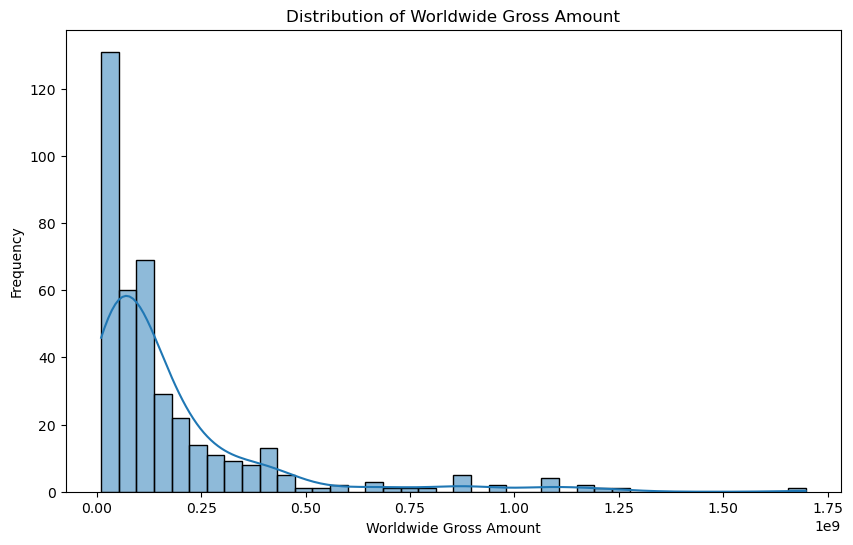

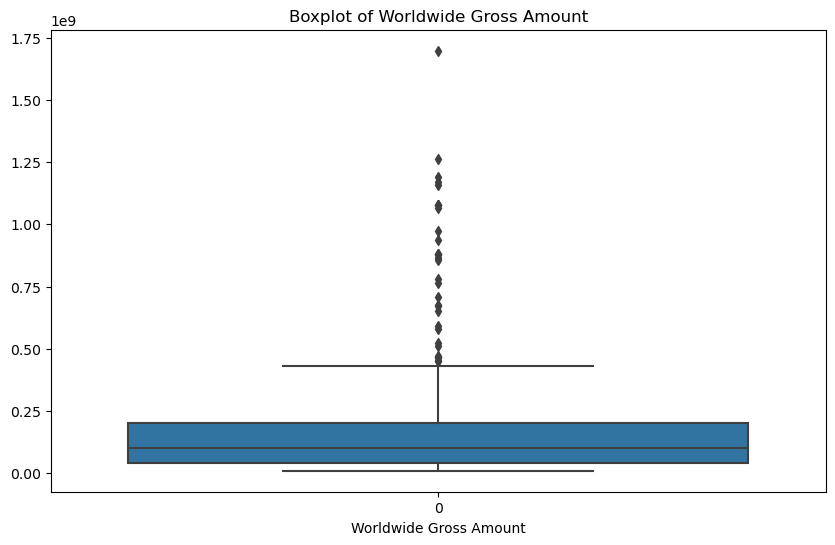

In [43]:
# Explore the distribution of worldwide gross amount
plt.figure (figsize = (10, 6) )
sns.histplot( movie_data ['worldwide_gross'], kde = True )
plt.title('Distribution of Worldwide Gross Amount' )
plt.xlabel( 'Worldwide Gross Amount')
plt.ylabel( 'Frequency')
plt.show()


plt.figure (figsize = (10, 6))
sns.boxplot (  movie_data['worldwide_gross'] )
plt.title ('Boxplot of Worldwide Gross Amount')
plt.xlabel ('Worldwide Gross Amount')
plt.show()

*__Analysis__*:

The above graphs provide us with comprehensive understanding of worldwide gross amounts generated by movies.

 **Histogram**
 
 The chart chows the frequency of worldwide gross amounts across different ranges
 We observe that:
 1. The majority of movies have a worldwide gross amount between 0 and 500 million dollars.
 2. There is a long tail of high-gross generating movies, with a few outliers exceeding 1 billion dollars (represented by 1e9 on the x-axis, which is equivalent to 1,000,000,000).
 3. The distribution is skewed to the right, indicating that most movies have relatively lower gross generating amount, while a few have extremely high grossing amounts.
 **This shows that there are specific movie genres that generate alot of income**

 __Boxplot__
 
 This is the second visualization. It provides a summary of the distribtion of median, quartiles and outliers.
 We observe that:
 1. The median worldwide gross amount is around 150-200 million dollars.
 2. The interquartile range (IQR) is relatively large, indicating that there is significant variation in worldwide gross amounts.
 3. There are several outliers, represented by points above the whiskers, which correspond to extremely high-grossing movies.


In [44]:
# Explore the relationship between worldwide gross amount and genre
genre_means = movie_data.groupby( 'genre')['worldwide_gross' ].mean()
genre_counts = movie_data.groupby('genre' )[ 'worldwide_gross'].count()

print("Genre Means:")
print(genre_means)
print("\nGenre Counts:")
print(genre_counts)

Genre Means:
genre
Action and Adventure           1.885116e+08
Animation                      2.574078e+08
Art House and International    1.290176e+08
Comedy                         1.878454e+08
Documentary                    1.724568e+08
Drama                          1.556261e+08
Horror                         1.203663e+08
Mystery and Suspense           2.294690e+08
Science Fiction and Fantasy    8.792220e+08
Name: worldwide_gross, dtype: float64

Genre Counts:
genre
Action and Adventure            55
Animation                       14
Art House and International     30
Comedy                         104
Documentary                     14
Drama                          149
Horror                          17
Mystery and Suspense            13
Science Fiction and Fantasy      1
Name: worldwide_gross, dtype: int64


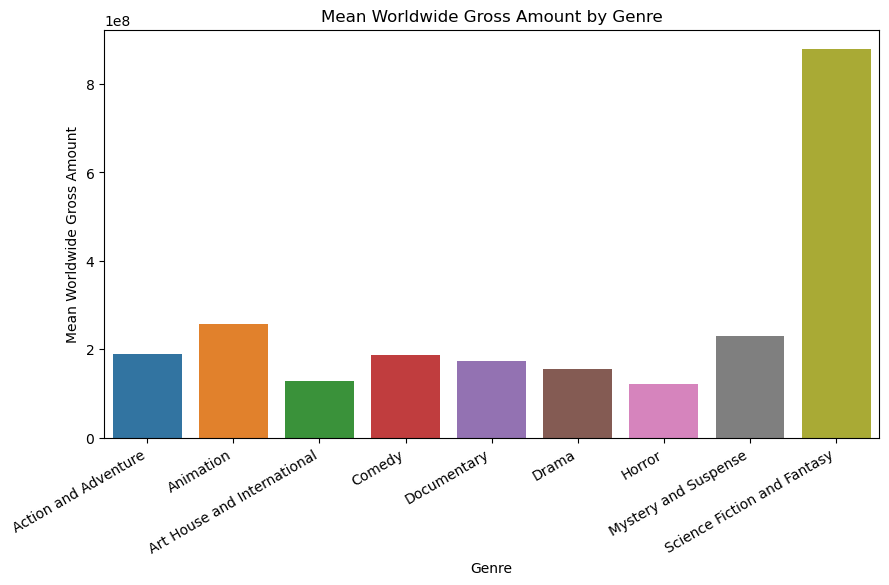

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_means.index, y=genre_means.values)
plt.title('Mean Worldwide Gross Amount by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Worldwide Gross Amount')
plt.gcf().autofmt_xdate()
plt.show()


*__Analysis:__*

This is a bar graph that portrays a clear representation of the relationship between genre and worldwide gross amount.
The plot shows that some genres tend to have higher or lower mean worldwide gross amounts than others, the highest genre being *science fiction and fantasy* and the lowest being *art house and international.*

The plot also shows the count of movies for each genre, which can provide insight into the popularity of each genre.

By analyzing this relationship, we can gain a better understanding of how genre influences the commercial success of movies. This information can be used to inform decisions about which genres to focus on for the new movie studio.


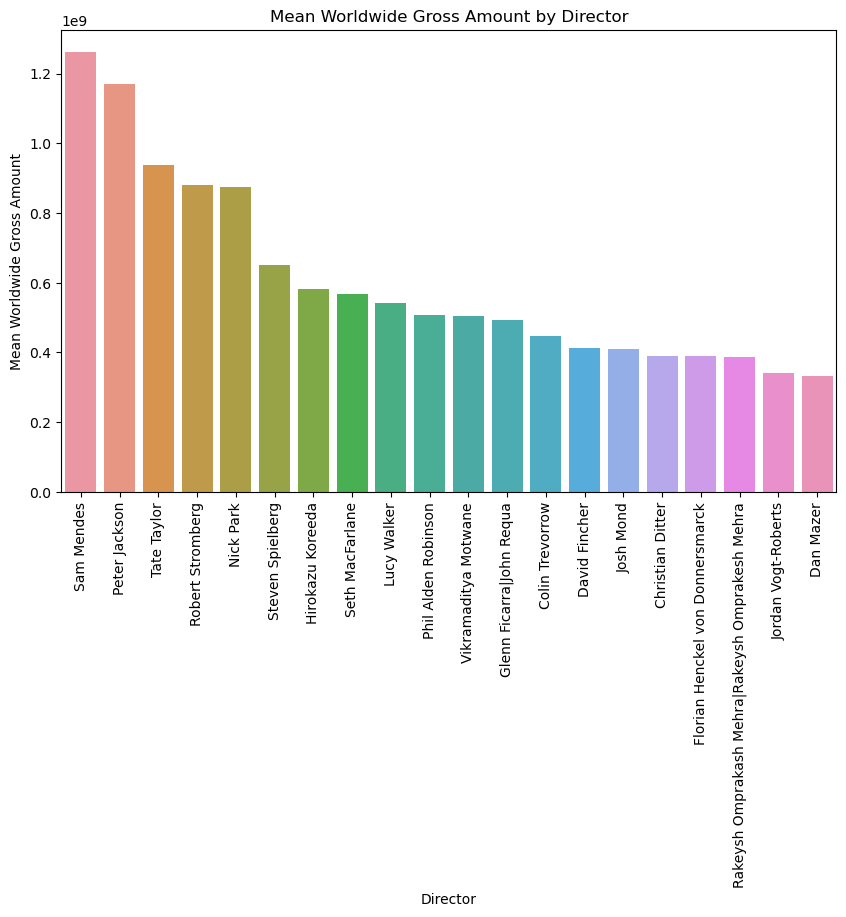

In [46]:
# Explore the relationship between worldwide gross amount and director
director_means = movie_data.groupby('director')['worldwide_gross'].mean()
director_counts = movie_data.groupby('director')['worldwide_gross'].count()

# Select the top 20 directors with the highest average worldwide gross amount
top_directors = director_means.nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y= top_directors.values)
plt.title('Mean Worldwide Gross Amount by Director')
plt.xlabel('Director')
plt.ylabel('Mean Worldwide Gross Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

*__Analysis:__*

The plot shows the top 20 directors  that tend to have higher mean of generating worldwide gross amounts than others. For example, Sam Mendes has the highest mean worldwide gross amount.

The y-axis label shows the mean worldwide gross amount in billions of dollars, represented by 1e9. This means that the values on the y-axis are in billions, so a value of 2e9 would represent a mean worldwide gross amount of 2 billion dollars.

The analysis of this relationship is important as we can gain a better understanding of which directors tend to produce movies with higher commercial success. This information can be used to inform decisions about which directors to work with for the new movie studio.


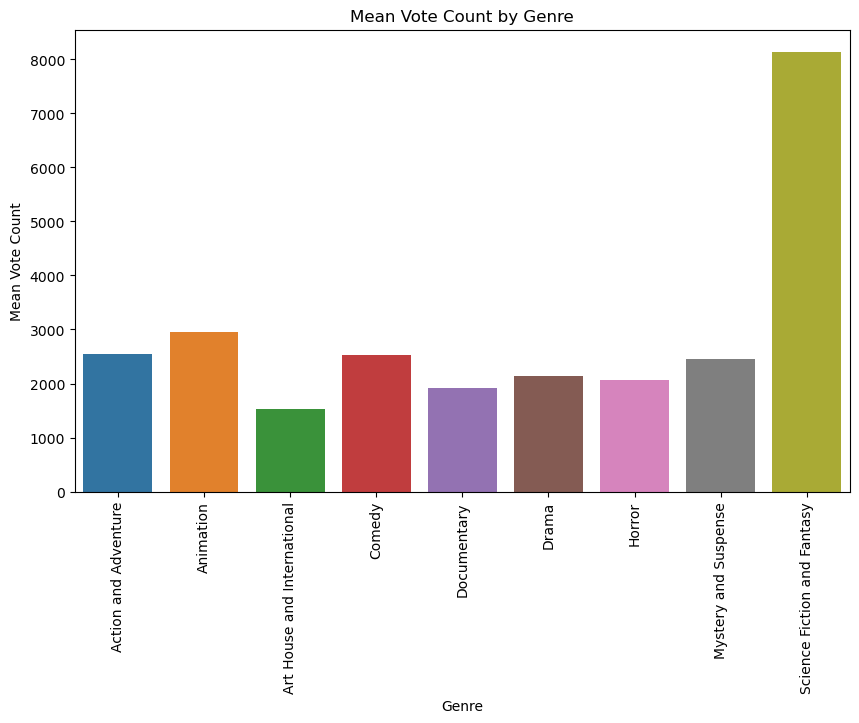

In [47]:
#  Explore and Group the data by genre and calculate the mean vote count
genre_vote_counts = movie_data.groupby('genre')['vote_count'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_vote_counts.index, y=genre_vote_counts.values)
plt.title('Mean Vote Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Vote Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

*__Analysis:__*
The mean vote count for each genre represents the average number of people who voted for their favorite movies within that genre. A higher mean vote count indicates that a genre is more popular among voters.

The decision to group the data by genre  is because we want to compare the popularity of different genres. By looking into the vote count data for each genre, we can determine which genres are most popular among voters. The top three genres are:
 1. Science fiction and fantasy
 2. Animation
 3. Action and Adventure


Correlation between runtime and vote count: 0.14


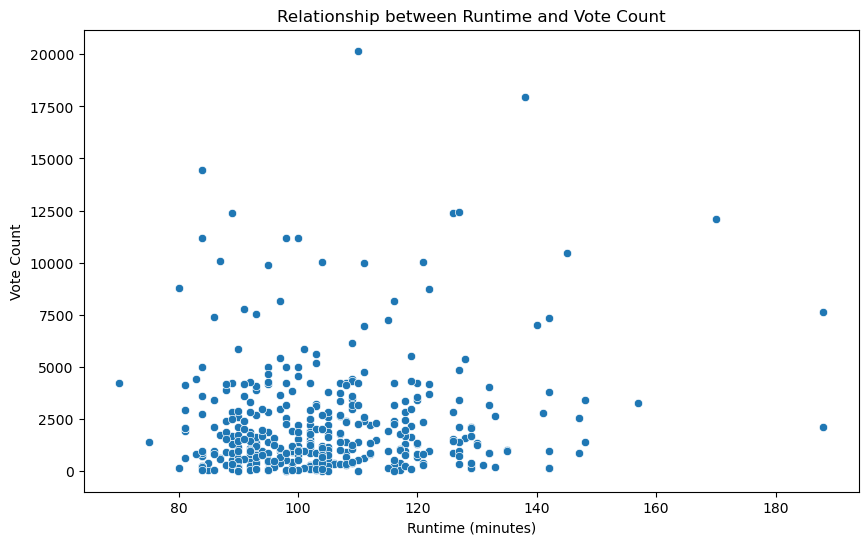

In [48]:
# Calculate the correlation between runtime and vote count
correlation = movie_data['runtime in minutes'].corr(movie_data['vote_count'])
print(f'Correlation between runtime and vote count: {correlation:.2f}')

# Plot the relationship between runtime and vote count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movie_data['runtime in minutes'], y=movie_data['vote_count'])
plt.title('Relationship between Runtime and Vote Count')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Count')
plt.show()

*__Analysis:__*

The scatter plot shows the individual data points for each movie, with the x-axis representing the runtime and the y-axis representing the vote count.

We chose to calculate the correlation between runtime and vote count because we want to understand if there is a relationship between the length of a movie and its popularity. This information can be useful when selecting genres for content creation, as it can help identify the types of movies that audiences prefer in terms of runtime.According to the scatterplots runtime of between 80 and 120 minutes id preferable to most people


The movie data set has a correlation of 0.14 indicating a weak positive relationship between the two variables. This co means that there is a weak relationship between the runtime and the vote count of movies. As the runtime increases, there is a slight tendency for the vote count to increase as well, but the relationship is not very strong.

### Hypothesis Testing and Linear Regression Section

The Hypothesis Testing and Linear Regression section is essential for validating our findings and making data-driven decisions. Hypothesis testing allows us to determine if differences in worldwide gross amounts between genres are statistically significant, while linear regression reveals how audience engagement, measured by vote counts, impacts financial success. These analyses ensure our recommendations are based on solid evidence, guiding strategic decisions on which genres to prioritize and how to optimize marketing strategies for maximum profitability

In [50]:
# Import necessary libraries
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

#### *__Business Question 1:__*

Is there a significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres?

**Null Hypothesis:** *There is no significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres.*

**Alternative Hypothesis:** *There is a significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres.*

In [51]:
# Extract the relevant data
sff_gross=  movie_data[ movie_data['genre']  == 'Science Fiction and Fantasy']['worldwide_gross']
other_gross=  movie_data[ movie_data['genre'] != 'Science Fiction and Fantasy']['worldwide_gross']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(sff_gross, other_gross)

print(f'T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

if p_val  < 0.05:
  print('Reject the null hypothesis. There is a significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres.')

T-statistic: 3.09, p-value: 0.0022
Reject the null hypothesis. There is a significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres.


**Interpretation**

The t-statistic of 3.09 and a p-value of 0.0022 indicate a significant difference in worldwide gross amounts between Science Fiction/Fantasy movies and other genres. With a p-value below 0.05, we reject the null hypothesis, suggesting that Science Fiction/Fantasy movies generally earn more globally compared to other genres. This difference is likely due to the high popularity of Science Fiction/Fantasy films, which often attract larger audiences and generate higher box office revenues. Using worldwide gross as a measure allows us to capture the global appeal and financial success of these movies, providing a clear indicator of their market impact.

##### *__Business Question 2:__*

Is there a linear relationship between the number of votes and worldwide gross amounts?

Linear regression  will be used to answer this question

In [52]:
# Prepare data for linear regression
X  = movie_data [ ['vote_count'] ]
y  = movie_data ['worldwide_gross']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model using R-squared
r2 = lr_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

if r2 > 0.5:
    print('There is a strong linear relationship between the number of votes and worldwide gross amounts.')
else:
    print('There is a weak linear relationship between the number of votes and worldwide gross amounts.')


R-squared: 0.62
There is a strong linear relationship between the number of votes and worldwide gross amounts.


**Interpretation**

Linear regression analysis reveals a strong linear relationship between the number of votes a movie receives and its worldwide gross, with an R-squared value of 0.62. This means that 62% of the variation in worldwide gross can be explained by the number of votes. In other words, movies with more votes tend to have higher worldwide gross amounts, indicating a significant predictive relationship.

This analysis highlights that audience engagement, as measured by votes, is a key factor in a movie's financial success. This insight can help studios and marketers forecast potential earnings and make informed decisions about marketing and promotion strategies.


##### *__Business Question 3:__*
Is a genre's success also dependent on the director?

**Null Hypothesis:** *There is no association between the genre of the movies and the director.*

**Alternative Hypothesis:** *There is an association between the genre of the movies and the director.*

The hypothesis test to be used here is the Chi-Squared Test for Independence


In [53]:
# Utilize 'genre' and 'director' are columns in your dataframe
contingency_table  = pd.crosstab( movie_data ['genre'], movie_data ['director'] )
# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print( f'Chi-squared  statistic: {chi2_stat:.2f}, p-value: {p_val:.4f}' )

Chi-squared  statistic: 2982.07, p-value: 0.0000


**Interpretataion**

 As the p-value is significantly less than 0.05, we reject the null hypothesis. This indicates a significant association between the genre of the movies and the director. 

 The chi-squared test demonstrates a significant relationship between movie genres and directors, suggesting that the genres a  director directs affect the popularity of a movie. Its importantto understand the directoral influence on genre preferences.

### Summary of Tests Done

The analysis of movie data has provided valuable insights into factors influencing the commercial success of films. The t-test results indicate a significant difference in worldwide gross between Science Fiction and Fantasy movies and other genres, with Science Fiction and Fantasy movies generally earning more. This is attributed to their high popularity and global appeal, which can lead to greater box office revenues. Using worldwide gross as a metric effectively captures the financial impact of these films, supporting the recommendation to focus on this genre.

Further analysis using linear regression revealed a strong linear relationship between the number of votes and worldwide gross amounts. This suggests that movies with more votes tend to have higher worldwide gross amounts, underscoring the importance of audience engagement in predicting financial success. Additionally, the chi-squared test for independence showed a significant association between movie genres and directors, implying that the genre a director works in can influence the movie's success. Based on these findings, it is recommended that the new studio prioritize Science Fiction and Fantasy, Animation, and Action and Adventure genres for production, and consider collaborating with successful directors to maximize box office potential.



## Recommendations

Based on the analysis, the top three genres that should be utilized for content creation are:

**Science Fiction and Fantasy:** This genre has the highest mean worldwide gross amount, indicating that it tends to generate the most revenue at the box office. Additionally, it is one of the most popular among voters, suggesting that it has a broad appeal. By creating content in this genre, the studio can tap into a large and lucrative market. Furthermore, Science Fiction and Fantasy movies often have a built-in fan base, which can lead to a loyal following and positive word-of-mouth.

**Animation:** This genre has a high mean vote count, indicating that it is highly regarded by audiences. Animation movies often appeal to a wide range of age from children to adults, making them a versatile and profitable option. Moreover, animation movies can be produced in a variety of styles, from traditional 2D to modern CGI, allowing for creative freedom and flexibility.

__Action and Adventure:__ This genre has a high mean worldwide gross amount, indicating that it tends to perform well at the box office. Action and Adventure movies often feature high-octane action sequences, thrilling stunts, and epic storylines, making them appealing to a broad audience. Additionally, this genre can be combined with other genres, such as Science Fiction or Fantasy, to create a unique and captivating cinematic experience.

These genres should be utilized because they tend to perform well at the box office and are popular among voters. By focusing on these genres, the studio can increase its chances of producing commercially successful movies that resonate with audiences.


## Conclusion

The analysis provides actionable insights that the head of the company's new movie studio can use to inform decisions about what type of films to create. By focusing on Science Fiction and Fantasy, Animation, and Action and Adventure genres, and creating movies with a runtime of between 80 and 120 minutes, the studio can increase its chances of producing commercially successful movies. Additionally, the studio should consider working with directors who have a track record of producing successful movies. By following these recommendations, the studio can make informed decisions and increase its chances of success in the competitive movie industry.